
# Project: Investigate TMDb movie data analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this dataset, we will be investigating the movies collected from movie database including user rating and revenue of the movies. In particular, We will be looking at:

1) what is the general trend of movie popularity over the years ? 
2) what are the elements associated with high revenue movies ? 
3) what is the most popular genres by year? what are the top three movies by popularity, revenue and vote average?

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [5]:
import pandas as pd
df = pd.read_csv('tmdb-movies.csv',encoding='latin-1')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2006-09-15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2004-01-15,2947,7.3,2015,174799923.1,1.385749e+09


> There are 21 columns associated in the database. 

In [6]:
df.shape

(10866, 21)

> There are 10866 rows and 21 columns in the movie dataset. 

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> As we can see in the summary statistics above, no missing data in all the columns;
   
   >   1) The movies collected are released between 1960 to 2015 **exclusively**; 
   
   >   2) The movie with the highest revenue is 2.78e9 whereas the average of the revenue is 3.98e7
   
   >   3) Vote_count: the most voted movie has 9767 votes whereas the least voted has only 10 votes
   
   >   4) The majority of the years of movies released is 2001. 
   >   5) There are movies with 0 in *"budget_adj" and *"revenue_adj". 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning for movie dataset 

>  As we can seen above, the fields *"homepage", *"tagline", *"keywords", *"production_companies" , *"genres", *"overview", *"director", *"cast", *"imdb_id" have missing values.
>  Next, I will **drop** the columns that are not going to be used.  

In [9]:
df.drop(['homepage','tagline', 'overview'], axis=1, inplace=True)

In [10]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2006-09-15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2004-01-15,2947,7.3,2015,174799923.1,1.385749e+09


> Then, I want to drop the duplicates

In [11]:
df.drop_duplicates(inplace=True)

> Next, I want to replace zero values with null values in the budget_adj and revenue_adj columns

In [14]:
df['budget_adj'] = df['budget_adj'].replace(0, np.NaN)
df['revenue_adj'] = df['revenue_adj'].replace(0, np.NaN)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 18 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              5169 non-null float64
revenue_adj             4849 non-null float64
dtypes: float64(4), int64(6), object(8)
memory usage: 1.6+ MB


> As seen above, there are signifcant number of missing data in keywords field. 

> Next, I will make histograms to compare the movies with missing keywords and the movies with and without keywords. 

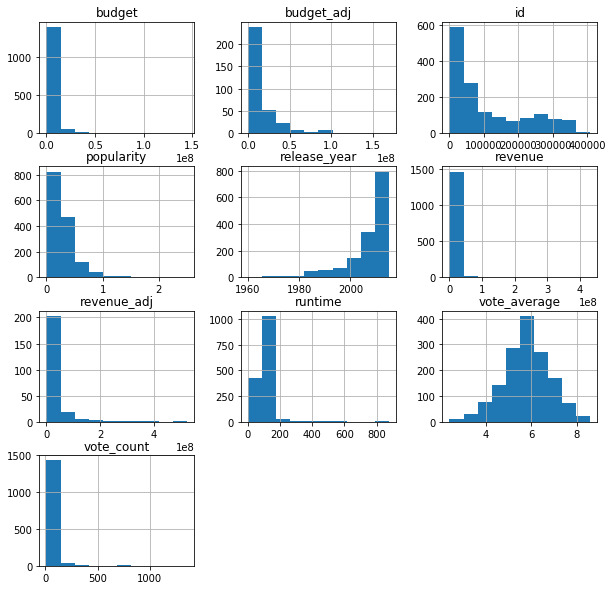

In [16]:
df[df.keywords.isnull()].hist(figsize=(10,10));

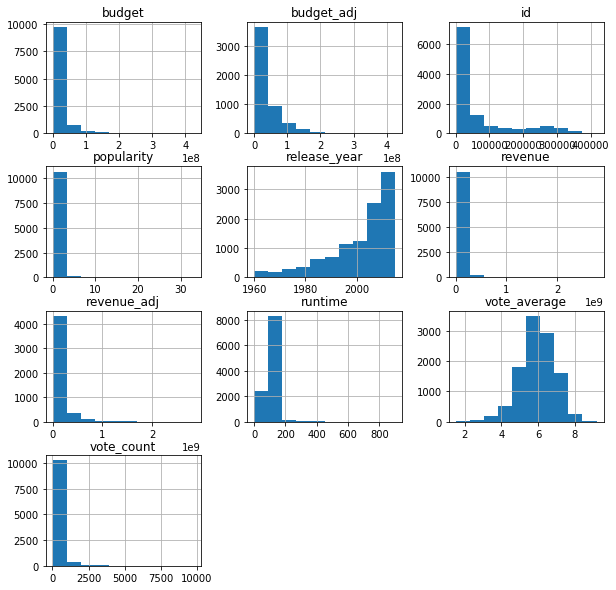

In [17]:
df.hist(figsize=(10,10));

>
As seen above, most movies are released after the year 2000. 

> **The movies missing keywords look like to have similar trends (the same direction of skewness) with the whole dataset.** 

> Next, I want to fill the nulls with mean values for the whole dataset (only applies to the quantitative fields). 

In [18]:
df.fillna(df.mean(), inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 18 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(6), object(8)
memory usage: 1.6+ MB


> It looks like the quantitative data is complete in large. All quantative data fields (ie. int 64 and float 64) have complete dataset. 

>However, some important data is missing from the categorical fields such as *genres, dierctors, cast, keywords, production_companies* etc. 

In [20]:
df[df.genres.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÌÄåÊ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,NaN,100,NaN,NaN,10/29/15,21,6.1,2015,3.688907e+07,1.151009e+08
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,90,NaN,Ruthless Pictures|Hollywood Shorts,2010-06-15,13,5.0,2015,3.688907e+07,1.151009e+08
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,NaN,44,NaN,NaN,2010-03-14,13,6.8,2014,3.688907e+07,1.151009e+08
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,NaN,88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,3.688907e+07,1.151009e+08
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,duringcreditsstinger,76,NaN,NaN,2/27/09,11,7.0,2009,3.688907e+07,1.151009e+08
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,NaN,0,NaN,NaN,2006-05-10,12,5.8,2010,3.688907e+07,1.151009e+08
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,62,NaN,NaN,12/25/10,11,7.7,2010,3.688907e+07,1.151009e+08
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÌãå±lmaz ErdoÌãüan|Demet Akbag|Altan Erkekli...,YÌãå±lmaz ErdoÌãüan,NaN,110,NaN,NaN,2002-02-01,12,7.2,2001,3.688907e+07,1.151009e+08
3279,54330,tt1720044,0.145331,0,0,ÌÂÛ¢Û_Ì»åüå¡ÌÂã¢âÂ ÌÇÛ_èÏ,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,NaN,96,NaN,NaN,8/13/08,11,6.1,2008,3.688907e+07,1.151009e+08
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Danny Boyle,NaN,220,NaN,BBC,7/27/12,12,8.3,2012,3.688907e+07,1.151009e+08


> I want to see what are the movies with missing genres info. 

> From the above, it looks like the movies that are missing "genres" _are also missing "revenue", "budget",
> "production companies" and "keywords". Hence, I will drop rows with missing values_. 

In [21]:
df.dropna(inplace=True)

> Since I will be using genres, production_companies etc. to analyze questions, 
> I decided to drop the nulls for these categorical data in order to have a complete dataset for objective anaysis. 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8664 entries, 0 to 10865
Data columns (total 18 columns):
id                      8664 non-null int64
imdb_id                 8664 non-null object
popularity              8664 non-null float64
budget                  8664 non-null int64
revenue                 8664 non-null int64
original_title          8664 non-null object
cast                    8664 non-null object
director                8664 non-null object
keywords                8664 non-null object
runtime                 8664 non-null int64
genres                  8664 non-null object
production_companies    8664 non-null object
release_date            8664 non-null object
vote_count              8664 non-null int64
vote_average            8664 non-null float64
release_year            8664 non-null int64
budget_adj              8664 non-null float64
revenue_adj             8664 non-null float64
dtypes: float64(4), int64(6), object(8)
memory usage: 1.3+ MB


> After droping the null rows in the categorical data, there are now 8665 movies data instead of 10866. I trimmed and cleaned the dataset to facilitate data analysis in a non-biased manner.  

<a id='eda'></a>
## Exploratory Data Analysis

### Research Part I: What is the general trend of movie popularity over the years ? 
### Research Part II: What are the elements associated with high revenue movies? 

### Research Part III: What is the most popular genres by year? What are the top three movies by popularity, revenue and vote average by year?¶

> Firstly, I want to use correlation function to see what are the variables are correlated high revenue movies so as to narrow down my assumptions among 18 columns of the dataset. 

### Part I: What is the general trend of movie popularity over the years ? 

In [23]:
# calculate the mean for popularity 
p_mean = df.groupby('release_year').mean()['popularity']
p_mean.head()

release_year
1960    0.481169
1961    0.446321
1962    0.465245
1963    0.516564
1964    0.421091
Name: popularity, dtype: float64

In [24]:
p_mean.tail()

release_year
2011    0.818565
2012    0.792775
2013    0.785601
2014    1.099509
2015    1.353584
Name: popularity, dtype: float64

In [25]:
# calculate the median for popularity over the years
p_median = df.groupby('release_year').median()['popularity']
p_median.tail()

release_year
2011    0.531976
2012    0.454471
2013    0.445302
2014    0.478419
2015    0.544513
Name: popularity, dtype: float64

> As we can see, the median data for popularity is more stable over the years.
> Next, we are ready to visualize the dataset. 

In [26]:
# set up the index location for x-axis
index_mean = p_mean.index
index_median = p_median.index

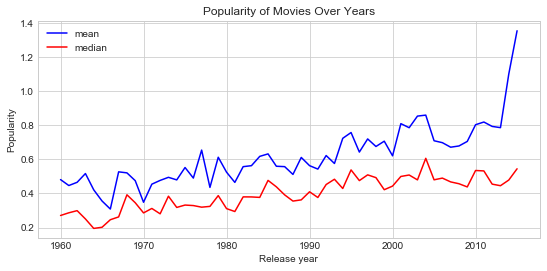

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,4))
x_mean, y_mean = index_mean, p_mean
x_median, y_median = index_median, p_median
plt.plot(x_mean, y_mean, color = 'b', label = 'mean')
plt.plot(x_median, y_median, color = 'r', label = 'median')
plt.title('Popularity of Movies Over Years')
plt.xlabel('Release year')
plt.ylabel('Popularity')
plt.legend(loc='best')

> From the figure above, we can see that the general trend of the movie popularity 
> is going upwards year to year. Even though the median of popularity is stable/smoothy 
> in recent years, *it is still rational to conclude movie popularity is increasing 
> in recent years.* 

> This phenomenon is due to easier access of movie infomation from the internet
> as well as widespread of movie advertisement and broadcasting more than before.

### Part II:  What are the elements associated with the production of high revenue movies? 

In [28]:
df.corr(method='pearson', min_periods=1)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.030803,-0.116650,-0.079776,-0.095331,-0.005836,-0.070965,0.495299,-0.092026,-0.066366
popularity,0.030803,1.000000,0.533149,0.659147,0.164353,0.801425,0.244965,0.137081,0.403788,0.520187
budget,-0.116650,0.533149,1.000000,0.729333,0.227838,0.624883,0.089857,0.170261,0.855600,0.500396
revenue,-0.079776,0.659147,0.729333,1.000000,0.195036,0.786637,0.194459,0.095578,0.636104,0.848970
runtime,-0.095331,0.164353,0.227838,0.195036,1.000000,0.196999,0.204014,-0.127792,0.211528,0.157000
vote_count,-0.005836,0.801425,0.624883,0.786637,0.196999,1.000000,0.288433,0.149857,0.499617,0.630867
vote_average,-0.070965,0.244965,0.089857,0.194459,0.204014,0.288433,1.000000,-0.124196,0.070971,0.162760
release_year,0.495299,0.137081,0.170261,0.095578,-0.127792,0.149857,-0.124196,1.000000,0.045248,-0.055747
budget_adj,-0.092026,0.403788,0.855600,0.636104,0.211528,0.499617,0.070971,0.045248,1.000000,0.530603
revenue_adj,-0.066366,0.520187,0.500396,0.848970,0.157000,0.630867,0.162760,-0.055747,0.530603,1.000000


>  As seen above, revenue (revenue_adj) is moderately positively corrleated with vote_count (r=0.7003), budget (r =0.611) and popularity (r=0.6016). 

>> Next, I want to see the relationship between revenue and vote_count, budget and popularity, respectively with the matplotlib visualization tool using scatter plot. 

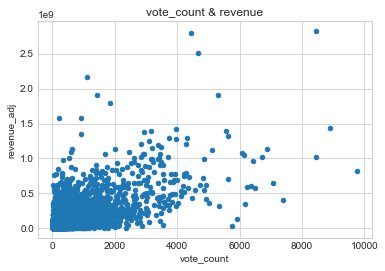

In [29]:
df.plot(x='vote_count', y = 'revenue_adj', kind = 'scatter', title = 'vote_count & revenue')

> As seen above, it appears that the majority of the vote_count are between 0 and 2000; 
> It follows **a positive correlation** between the revenue and vote_count. 

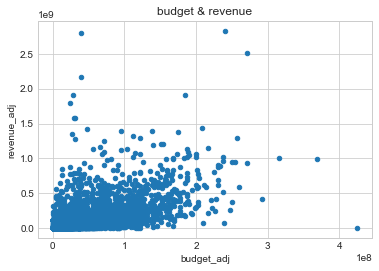

In [30]:
df.plot(x='budget_adj', y = 'revenue_adj', kind = 'scatter', title = 'budget & revenue')

> As indicated above, the budget is **moderately correlated** with the revenue. 

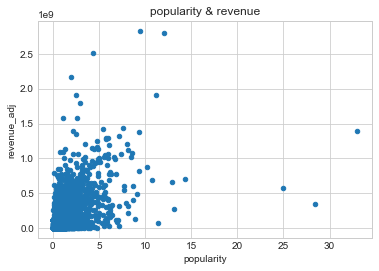

In [31]:
df.plot(x='popularity', y = 'revenue_adj', kind = 'scatter', title = 'popularity & revenue')

> As shown, movie's revenue is positively correlated with the popularity.

> In Summary:  
>> According to the scatter plots, it looks like the higher revenue movies are common in having higher popularity, higher voting counts and higher budgets compared to other elements. 

> However, **correlation does not imply causation.** 

### Part III: What is the most popular genre by year ? What are the top three movies by popularity, revenue and vote average by year? 

### What is the most popular genre by year? 

In [32]:
df.groupby('release_year').apply(lambda grp: grp.nlargest(1,'popularity'))

,,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
release_year,,,,,,,,,,,,,,,,,,,
1960,10141,539,tt0054215,2.610362,806948,32000000,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960,5.949601e+06,2.359350e+08
1961,10110,12230,tt0055254,2.631987,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,puppy|animation|dog|dalmatian,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,1/25/61,913,6.6,1961,2.917944e+07,1.574815e+09
1962,9849,646,tt0055928,3.170651,1100000,59600000,Dr. No,Sean Connery|Ursula Andress|Joseph Wiseman|Jac...,Terence Young,london|england|assassination|spy|casino,110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),10/4/62,560,6.7,1962,7.929294e+06,4.296236e+08
1963,10438,657,tt0057076,2.508235,2500000,78898765,From Russia With Love,Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...,Terence Young,venice|london|terror|england|assassination,115,Action|Thriller|Adventure,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,10/11/63,458,6.7,1963,1.780045e+07,5.617734e+08
1964,9881,658,tt0058150,3.153791,3500000,124900000,Goldfinger,Sean Connery|Honor Blackman|Gert FrÌÄå¦be|Shir...,Guy Hamilton,secret organization|secret intelligence servic...,110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),9/17/64,602,7.0,1964,2.460594e+07,8.780804e+08
1965,10689,660,tt0059800,1.910465,11000000,141195658,Thunderball,Sean Connery|Claudine Auger|Adolfo Celi|Lucian...,Terence Young,paris|florida|fighter pilot|sanatorium|secret ...,130,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),12/16/65,331,6.3,1965,7.612620e+07,9.771535e+08
1966,10820,13377,tt0060345,1.227582,315000,0,How the Grinch Stole Christmas!,Boris Karloff|June Foray|Thurl Ravenscroft|Dal...,Chuck Jones|Ben Washam,holiday|based on novel|monster|obsession|santa...,26,Animation|Family|Comedy,MGM Television|The Cat in the Hat Productions,12/18/66,286,7.1,1966,2.116175e+06,1.151009e+08
1967,10398,9325,tt0061852,2.550704,4000000,205843612,The Jungle Book,Phil Harris|Sebastian Cabot|Louis Prima|George...,Wolfgang Reitherman,indian|snake|lion|musical|feral child,78,Family|Animation|Adventure,Walt Disney Pictures,10/18/67,928,7.0,1967,2.614705e+07,1.345551e+09
1968,9719,62,tt0062622,3.309196,12000000,56715371,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,Stanley Kubrick,moon|jupiter|artificial intelligence|man vs ma...,149,Science Fiction|Mystery|Adventure,Stanley Kubrick Productions|Metro-Goldwyn-Maye...,4/5/68,1708,7.7,1968,7.522756e+07,3.555466e+08


### What are the top three movies by popularity, revenue and vote average ? 

In [43]:
# Select top 100 popular movies
# first sort by the year of release ascending and popularity descending order
df_top_p = df.sort_values(['release_year', 'popularity'], ascending=[True, False])
# group by year and choose the top 100 high popularity movies
df_top_p = df_top_p.groupby('release_year'). head(100). reset_index(drop=True)
# check, it must start from 1960, and with high popularity to low
df_top_p.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,539,tt0054215,2.610362,806948,32000000,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960,5.949601e+06,2.359350e+08
1,966,tt0054047,1.872132,2000000,4905000,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,horse|village|friendship|remake|number in title,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,10/23/60,224,7.0,1960,1.474593e+07,3.616441e+07
2,967,tt0054331,1.136943,12000000,60000000,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,gladiator|roman empire|gladiator fight|slavery...,197,Action|Drama|History,Bryna Productions,10/6/60,211,6.9,1960,8.847561e+07,4.423780e+08


In [34]:
# Select top 100 high revenue movies. 
# first sort it by release year ascending and revenue descending 
df_top_r = df.sort_values(['release_year', 'revenue'], ascending=[True, False])
# group by year and choose the top 100 high 
df_top_r = df_top_r.groupby('release_year').head(100).reset_index(drop=True)
df_top_r.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,967,tt0054331,1.136943,12000000,60000000,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,gladiator|roman empire|gladiator fight|slavery...,197,Action|Drama|History,Bryna Productions,10/6/60,211,6.9,1960,8.847561e+07,442378047.4
1,539,tt0054215,2.610362,806948,32000000,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960,5.949601e+06,235934958.6
2,284,tt0053604,0.947307,3000000,25000000,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,6/15/60,235,7.9,1960,2.211890e+07,184324186.4


In [35]:
#Select top 100 high score rating movies in every year
# Select top 100 high score rating movies
# first sort it by release year ascending and high scorer descending
df_top_s = df.sort_values(['release_year', 'vote_average'], ascending=[True, False])
# group by year and choose the top 100 high 
df_top_s = df_top_s.groupby('release_year').head(100).reset_index(drop=True)
# check, it must start from 1960, and with high score rating to low
df_top_s.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,539,tt0054215,2.610362,806948,32000000,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960,5.949601e+06,2.359350e+08
1,284,tt0053604,0.947307,3000000,25000000,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,6/15/60,235,7.9,1960,2.211890e+07,1.843242e+08
2,11167,tt0054167,0.569424,0,0,Peeping Tom,Karlheinz BÌÄå¦hm|Moira Shearer|Anna Massey|Ma...,Michael Powell,cinematographer|photography|illegal prostitution,101,Horror|Thriller,National Film Finance Corporation (NFFC)|Anglo...,4/6/60,56,7.4,1960,3.688907e+07,1.151009e+08


In [39]:
df_top_p.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,539,tt0054215,2.610362,806948,32000000,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960,5.949601e+06,2.359350e+08
1,966,tt0054047,1.872132,2000000,4905000,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,horse|village|friendship|remake|number in title,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,10/23/60,224,7.0,1960,1.474593e+07,3.616441e+07
2,967,tt0054331,1.136943,12000000,60000000,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,gladiator|roman empire|gladiator fight|slavery...,197,Action|Drama|History,Bryna Productions,10/6/60,211,6.9,1960,8.847561e+07,4.423780e+08


In [60]:
# split pipe characters and count the number of appeared times
# arguments: 'df_col' is the target dataframe & column; 'num' is the number of top factor
def find_top(df_col, num=5):
    # split the characters in the input column and transfer it to a list
    newlist = df_col.str.cat(sep='|').split('|')
    new = pd.df({'top' :newlist})
    top = new ['top'].value_counts().head(num)
    return top 

> Problem arised when using df_col = df_top_p.cast in the function. I saw the error as  'AttributeError: module 'pandas' has no attribute 'df'. 

<a id='conclusions'></a>
## Conclusions

#### Part I: movie popularity trend 
> It shows that the movie popularity is increasing since 1960. 

#### Part II: Elements associated with high revenue movies 
> It is concluded that high revenue movie productions are associated with 
> higher budget, higher rating average and higher popularity among the audience. However, it is worth noting that the data trends show correlations but not causation. Higher budget, higher rating average and higher popularity do not cause the higher revenue of a movie. 

#### Part III: What is the most popular genre by year ? What are the top three movies by popularity, revenue and vote average by year?

> The details can be reviewed in the tables generated in Part III. 

#### Limitation 
> 1 In Part III, initially I was planning to use split function to review the most popular keywords and genres, directors, production company by year; however, for an attribute error that I could not solve after extended-period of time, I was not able to further investigate the quesiton. The error I received is "module 'pandas'has no attribute df. 
After checking online, I still not able to solve the error.

> 2 In Part II, I discussed the elements associated with high revenue movies. However, it is worth mentioning that higher budget, high rating average and higher popularity do not cause a movie to have a high revenue. That is to say, correlation does not imply causation. 

> 3 For Part III, I did not count the number of vote into consideration, so the rating score may be biased when the vote number is low. 

> 4 Data quality: For the revenue and budget fields, even though I assumed that the zero values in revenue and budget column are missing, there are still a lot of unreasonable big/small value in both columns. For example, 50 percentile of the revenue and budget columns are 0! Moreover, the dataset did not present the metrices for the rating and popularity clearly, therefore, biases among them can vary year by year. 

> 5 Revenue and budget of the movies, I am not certain if they are all in US dollars ? 

> 6 Sample size: The sample size of the dataset is considerated as effective/big (n=8664). 


In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255